# This is the notebook for the project of Applied Data Analysis.

### This project is based on the data of the openfood dataset found on https://world.openfoodfacts.org/data 

The goal of this notebook is the following:

1) Learn to handle the datas that we use

2) Understand the format of the datas (and also clean them)

3) Filter and transform the datas


#### First we need to import every library we will need and import the datas

In [1]:
# Put your imports here.
import os
import pandas as pd
import json
import folium
import numpy as np
from datetime import datetime, date, time
import dateutil.parser
import matplotlib.pyplot as plt
import collections

# WARNING : Make sure that Seaborn is updated (0.9.0) on your computer !
import seaborn as sns

Now we load the datas from the csv file

In [2]:
DATAPATH = "./data/"

In [3]:
food = pd.read_csv(DATAPATH+ "openfoodfacts.csv", sep='\t', low_memory = False)

In [4]:
food_cleaned = food.copy()

In [5]:
food_cleaned.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000018,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369398,2018-11-16T11:56:38Z,1542369398,2018-11-16T11:56:38Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000019,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369403,2018-11-16T11:56:43Z,1542369403,2018-11-16T11:56:43Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
food_cleaned.dropna(how="all",inplace = True)
food_cleaned.dropna(how="all",axis=1,inplace=True)

We can also separate the table into two parts. We can split the food properties (energy and others) from the rest of the table. This way we will only handle a smaller table containing the values that we need. And if needed later on, we can check the values of the nutriments in the other table.

The columns that are concerned finishes with "_100g"

In [7]:
Col_nutriments = []
for c in food_cleaned.columns:
    if c.endswith("_100g"):
        Col_nutriments.append(c)
Col_nutriments
nutriments = food_cleaned[Col_nutriments]

In [8]:
food_cleaned.drop(columns=Col_nutriments,inplace=True)

In [9]:
food_cleaned = food_cleaned[pd.notnull(food_cleaned['created_datetime'])].reset_index()

In [10]:
food_cleaned.head()

,index,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,...,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,...,"en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,000000000018,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369398,2018-11-16T11:56:38Z,1542369398,2018-11-16T11:56:38Z,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,000000000019,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369403,2018-11-16T11:56:43Z,1542369403,2018-11-16T11:56:43Z,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First we notice that we can remove the column code since the `code` can be found in the end of each url in the column `url`. First check that this is correct:

In [11]:
url = food_cleaned.url.apply(lambda s: str(s).split("/"))

In [12]:
new_url = []
indices_bad = []
for i in range(len(url)):
    try:
        new_url.append(url[i][4])
    except:
        indices_bad.append(i)
        continue
len(new_url)

695172

In [13]:
food_cleaned.created_datetime[indices_bad]

264659                                 Magasins U,Carrefour
264712                                               Auchan
264778                                          Dia,Sogeres
264794                                              Super U
264818                                               Auchan
264831                                            Carrefour
264840                                               Auchan
264892    Banque alimentaire,Carrefour,Leclerc,E.Leclerc...
264912                                 Franprix,Intermarché
264922                                     Carrefour market
264924                                     Carrefour market
264929                                       Super U,Lecler
264940                                                 Spar
264942                                   Banque alimentaire
264949                                              Leclerc
264952                                       Auchan,Super U
264988                                  

We notice that some entries are completly wrong, so we will remove them...

In [14]:
food_cleaned.drop(indices_bad, inplace=True)

Now, we can compare the urls that we have with the code, in order to see if the assumption that we made is correct

In [15]:
code = food_cleaned.code.values

In [16]:
new_url = np.array(new_url)

In [17]:
np.sum(new_url == code) == len(code) # Check if is only true value, so the sum must be equal to the length of the arrays

True

Great, so now we can safely remove the column `code` since all the information about the code can be found in the url!

In [18]:
food_cleaned.drop(columns = ['code'],inplace=True)

In [19]:
# We also remove the index column
food_cleaned.drop(columns = ['index'],inplace=True)
food_cleaned.head()

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,...,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,NaN,...,"en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369398,2018-11-16T11:56:38Z,1542369398,2018-11-16T11:56:38Z,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369403,2018-11-16T11:56:43Z,1542369403,2018-11-16T11:56:43Z,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We now need to transform the columns containing time. To do so, we know (from the description of the columns given on openfoodfacts) that the columns starting ending with a certain suffix are the one containing dates:

1) datetime : yyyy-mm-ddThh:mn:ssZ

2) t : unix timestamp

So we first need to find all the columns that respect one of the above criteria and transform those columns to the right format

In [20]:
food_cleaned.created_datetime.values

array(['2018-06-15T10:38:00Z', '2018-10-13T21:06:14Z',
       '2018-08-31T17:53:02Z', ..., '2018-10-15T09:55:58Z',
       '2018-02-20T17:07:29Z', '2018-10-06T09:33:52Z'], dtype=object)

In [21]:
# Find the columns whose name finishes by "_datetime"
col_datetime = [c for c in food_cleaned.columns if c.endswith("_datetime")]
# Same for the columns whose name finishes by "_t"
col_t = [c for c in food_cleaned.columns if c.endswith("_t")]
#food_datetime = food_cleaned[col_datetime]
#food_t = food_cleaned[col_t]

First we modify the datetime column, using the strptime method.

In [22]:
food_cleaned[col_datetime[0]] = food_cleaned[col_datetime[0]].apply(lambda d: datetime.strptime(d,"%Y-%m-%dT%H:%M:%SZ"))

In [23]:
food_cleaned[col_datetime[1]] = food_cleaned[col_datetime[1]].apply(lambda d: datetime.strptime(d,"%Y-%m-%dT%H:%M:%SZ"))

In [24]:
food_cleaned.head()

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,...,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15 10:38:00,1529059204,2018-06-15 10:40:04,Vitória crackers,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13 21:06:14,1539464817,2018-10-13 21:06:57,Cacao,NaN,130 g,NaN,...,"en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31 17:53:02,1535737986,2018-08-31 17:53:06,Sauce Sweety chili 0%,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369398,2018-11-16 11:56:38,1542369398,2018-11-16 11:56:38,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1542369403,2018-11-16 11:56:43,1542369403,2018-11-16 11:56:43,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we need to take care of the unix format

In [25]:
food_cleaned[col_t[0]] = pd.to_datetime(food_cleaned[col_t[0]],unit='s')

In [26]:
food_cleaned[col_t[1]] = pd.to_datetime(food_cleaned[col_t[1]],unit='s')

In [27]:
food_cleaned.head()

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,...,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15 10:38:00,2018-06-15 10:38:00,2018-06-15 10:40:04,2018-06-15 10:40:04,Vitória crackers,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://world-en.openfoodfacts.org/product/0000...,isagoofy,2018-10-13 21:06:14,2018-10-13 21:06:14,2018-10-13 21:06:57,2018-10-13 21:06:57,Cacao,NaN,130 g,NaN,...,"en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-08-31 17:53:02,2018-08-31 17:53:02,2018-08-31 17:53:06,2018-08-31 17:53:06,Sauce Sweety chili 0%,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2018-11-16 11:56:38,2018-11-16 11:56:38,2018-11-16 11:56:38,2018-11-16 11:56:38,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2018-11-16 11:56:43,2018-11-16 11:56:43,2018-11-16 11:56:43,2018-11-16 11:56:43,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We notice that the date in Unix format and the other one are exactly the same, so we can get rid of one of the two.
This will again reduce the size of the dataframe, and will be easier to handle

In [28]:
# Verify that it is indeed the same
np.sum(food_cleaned.created_t.values == food_cleaned.created_datetime.values) == len(food_cleaned.created_t.values)

True

In [29]:
# Verify that it is indeed the same
np.sum(food_cleaned.last_modified_t.values == food_cleaned.last_modified_datetime.values) == len(food_cleaned.last_modified_t.values)

True

In [30]:
# We drop the "_datetime" (arbitrary choice)
food_cleaned.drop(columns = ['created_datetime'],inplace=True)
food_cleaned.drop(columns = ['last_modified_datetime'],inplace=True)

In [31]:
food_cleaned.head()

,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,brands,...,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15 10:38:00,2018-06-15 10:40:04,Vitória crackers,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://world-en.openfoodfacts.org/product/0000...,isagoofy,2018-10-13 21:06:14,2018-10-13 21:06:57,Cacao,NaN,130 g,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-08-31 17:53:02,2018-08-31 17:53:06,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2018-11-16 11:56:38,2018-11-16 11:56:38,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2018-11-16 11:56:43,2018-11-16 11:56:43,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We now need to check if there are columns that contains only `NaN`values in it. 

In [32]:
col_na = []
for col in food_cleaned:
    if(food_cleaned[str(col)].isna().all()):
        col_na.append(str(col))
col_na

['allergens_en', 'no_nutriments']

There are still two columns that contains only `NaN` values in it, so we can remove them two.

In [33]:
food_cleaned.drop(columns=col_na,inplace=True)

In [34]:
food_cleaned.head()

,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,brands,...,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15 10:38:00,2018-06-15 10:40:04,Vitória crackers,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://world-en.openfoodfacts.org/product/0000...,isagoofy,2018-10-13 21:06:14,2018-10-13 21:06:57,Cacao,NaN,130 g,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-08-31 17:53:02,2018-08-31 17:53:06,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2018-11-16 11:56:38,2018-11-16 11:56:38,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2018-11-16 11:56:43,2018-11-16 11:56:43,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now we clean part of the table. We still need to know what we want to do with na values in this table.

1) We can replace them all by 0. This is not necessary a good solution since some of those Na values are string and some are floats.

2) We can replace the floats na values with a 0 and the string with a empty space.

The last solution is better since it takes into account the type of the column.

In [35]:
# Do this part

At this point, we have two tables that are cleaned (one containing the nutriment informations),the other contains all the rest of the table. We removed the columns that contains only `NaN` values and removed the columns that are redudant, as for example the time of creation and last modification and also the column for the bar-code, since this value can be found in the url of the product. 

Let's check out the columns that we can remove, not because they don't contain information but because the information inside is not useful

In [36]:
# The first we check is the "generic_name" column
print((len(food_cleaned.generic_name)-np.sum(food_cleaned.generic_name.isnull()))/len(food_cleaned.generic_name))
"""
for i in range(len(food_cleaned.generic_name)):
    if (not (pd.isnull(food_cleaned.generic_name[i]))):
        print(food_cleaned.product_name[i])
        print(food_cleaned.generic_name[i])
        print("===========")
"""
# The problem with the generic name is that there is a lot of values that are not well-written. 
# Some people didn't undertand how to fill this value... 
# Plus only 11 percent of the total values are different than nan values... Do we drop the column?

0.111171048316


'\nfor i in range(len(food_cleaned.generic_name)):\n    if (not (pd.isnull(food_cleaned.generic_name[i]))):\n        print(food_cleaned.product_name[i])\n        print(food_cleaned.generic_name[i])\n        print("===========")\n'

In [37]:
food_cleaned.drop(columns=["countries_tags","countries"],inplace=True)

In [38]:
food_cleaned.head()

,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,brands,...,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15 10:38:00,2018-06-15 10:40:04,Vitória crackers,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://world-en.openfoodfacts.org/product/0000...,isagoofy,2018-10-13 21:06:14,2018-10-13 21:06:57,Cacao,NaN,130 g,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-08-31 17:53:02,2018-08-31 17:53:06,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2018-11-16 11:56:38,2018-11-16 11:56:38,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2018-11-16 11:56:43,2018-11-16 11:56:43,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the name of the countries, we can replace the names as strings into list of strings and change the name of the column as `countries`

In [39]:
food_cleaned.countries_en = food_cleaned.countries_en.str.split(",")
food_cleaned.rename(index = str, columns = {"countries_en":"countries"},inplace = True)

In [40]:
food_cleaned.countries.head() # Now this part is good

0      [France]
1      [France]
2      [France]
3    [Slovakia]
4    [Slovakia]
Name: countries, dtype: object

In [41]:
# We check is the "labels" columns
print(-np.sum(food_cleaned.labels_en.isnull())-len(food_cleaned.labels_en))
print(-(np.sum(food_cleaned.labels_en.isnull())-len(food_cleaned.labels_en))/len(food_cleaned.labels_en))
"""
for i in range(len(food_cleaned.labels_en)):
    if (not (pd.isnull(food_cleaned.labels_en[i]))):
        print(food_cleaned.labels_en[i])
        print(food_cleaned.labels_tags[i])
        print(food_cleaned.labels[i])
        print("===========")
"""
#Only 14 percents of values are interesting (not nan...)


-1288297
0.14679388698


'\nfor i in range(len(food_cleaned.labels_en)):\n    if (not (pd.isnull(food_cleaned.labels_en[i]))):\n        print(food_cleaned.labels_en[i])\n        print(food_cleaned.labels_tags[i])\n        print(food_cleaned.labels[i])\n        print("===========")\n'

We notice that the three columns contain the same informations, and that it is all separated by commas. So, we can drop two out of three columns and replace the string by a list of string for the column that we keep. We do the same that we did for the country.

In [42]:
food_cleaned.labels_en.values

array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [43]:
food_cleaned.drop(columns=["labels_tags","labels"],inplace=True)
food_cleaned.labels_en = food_cleaned.labels_en.str.split(",")
food_cleaned.rename(index = str, columns = {"labels_en":"labels"},inplace = True)

In [44]:
food_cleaned.head()

,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,packaging_tags,brands,...,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15 10:38:00,2018-06-15 10:40:04,Vitória crackers,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://world-en.openfoodfacts.org/product/0000...,isagoofy,2018-10-13 21:06:14,2018-10-13 21:06:57,Cacao,NaN,130 g,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-08-31 17:53:02,2018-08-31 17:53:06,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2018-11-16 11:56:38,2018-11-16 11:56:38,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2018-11-16 11:56:43,2018-11-16 11:56:43,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
(np.sum(food_cleaned.packaging.isnull()) - len(food_cleaned.packaging))/len(food_cleaned.packaging)
# 20 % of infos available and furthermore, it is not consistent.... So we drop this column.
# Same for the column packaging_tags so we drop.

-0.20152135011191474

In [46]:
food_cleaned.drop(columns=["packaging_tags","packaging"],inplace=True)

In [47]:
food_cleaned.head()

,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,brands,brands_tags,categories,...,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15 10:38:00,2018-06-15 10:40:04,Vitória crackers,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://world-en.openfoodfacts.org/product/0000...,isagoofy,2018-10-13 21:06:14,2018-10-13 21:06:57,Cacao,NaN,130 g,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-08-31 17:53:02,2018-08-31 17:53:06,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2018-11-16 11:56:38,2018-11-16 11:56:38,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2018-11-16 11:56:43,2018-11-16 11:56:43,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We now continue with the other columns...

In [48]:
food_cleaned.brands_tags

0                             NaN
1                             NaN
2                             NaN
3                             NaN
4                             NaN
5                             NaN
6                             NaN
7                             NaN
8                             NaN
9                             NaN
10                            NaN
11                            NaN
12                          crous
13              crous-resto,crous
14                            NaN
15                            NaN
16                            NaN
17        ferme-de-la-fremondiere
18                            NaN
19                          crous
20                            NaN
21                            NaN
22                            NaN
23                            NaN
24                    crous-resto
25                            NaN
26                            NaN
27                            NaN
28                            NaN
29            

In [49]:
def percentageNonNa(data):
    return (len(data)-np.sum(data.isnull()))/len(data)

In [50]:
print(percentageNonNa(food_cleaned.brands))
print(percentageNonNa(food_cleaned.brands_tags))

0.667516815982
0.667469345716


In [51]:
print((food_cleaned.brands.value_counts() > 100).sum())
print((food_cleaned.brands.value_counts() <= 100).sum())

449
99110


We will keep the data concerning the brands, since it may be interesting later on. We will only keep the column `brands_tags` since it is more uniform.

In [52]:
food_cleaned.drop(columns=["brands_tags"],inplace=True)

In [53]:
percentageNonNa(food_cleaned.categories)

0.257841224905491

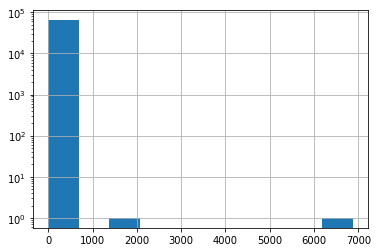

In [54]:
food_cleaned.categories.value_counts().hist(log=True)

In [55]:
print((food_cleaned.categories.value_counts() > 100).sum())
print((food_cleaned.categories.value_counts() <= 100).sum())

88
63960


In [56]:
# Drop the categories since not useful for us...
food_cleaned.drop(columns=["categories","categories_tags","categories_en"],inplace=True)

In [57]:
percentageNonNa(food_cleaned.origins) 
# Not enough infos, we drop

0.060866950912867604

In [58]:
food_cleaned.drop(columns=["origins","origins_tags"],inplace=True)

In [59]:
percentageNonNa(food_cleaned.manufacturing_places_tags)# Not enough infos, we drop

0.096555960251563641

In [60]:
food_cleaned.drop(columns=["manufacturing_places","manufacturing_places_tags"],inplace=True)

In [61]:
percentageNonNa(food_cleaned.emb_codes)
# Not useful and not enough infos, so we drop

0.06332245832686012

In [62]:
food_cleaned.drop(columns=["emb_codes","emb_codes_tags"],inplace=True)

In [63]:
percentageNonNa(food_cleaned.first_packaging_code_geo)
# Not useful and not enough infos, so we drop

0.040031819463384598

In [64]:
food_cleaned.drop(columns=["first_packaging_code_geo"],inplace=True)

In [65]:
percentageNonNa(food_cleaned.cities_tags)
# Not useful and not enough infos, so we drop

0.042636930141029844

In [66]:
food_cleaned.drop(columns=["cities_tags"],inplace=True)

In [67]:
percentageNonNa(food_cleaned.purchase_places)
# We drop since we already have the countries with this infos, we don't need to have it double 

0.14491233824147118

In [68]:
food_cleaned.drop(columns=["purchase_places"],inplace=True)

In [69]:
percentageNonNa(food_cleaned.stores)

0.13094457199081666

In [70]:
food_cleaned.stores.value_counts()
# We keep this value since it can be interesting, we only need to 

Magasins U                          11796
Carrefour                            7105
Leclerc                              4291
Auchan                               3984
Lidl                                 3126
Intermarché                          3019
Cora                                 2285
Aldi                                 1894
Franprix                             1542
Casino                               1482
Monoprix                             1327
Picard                               1239
Super U, Magasins U                  1233
Leader Price                         1190
Migros                               1089
LIDL                                 1011
Netto                                 982
Dia                                   958
Super U                               940
Edeka                                 846
Carrefour Market                      790
Noz                                   739
Carrefour, Magasins U                 703
Marks & Spencer                   

In [71]:
food_cleaned.stores = food_cleaned.stores.str.split(",")

In [72]:
percentageNonNa(food_cleaned.ingredients_text)

0.56631308510699507

The ingredients could be useful later on for the analysis of the datas. However, the `traces` and `traces_tags` will not be useful and thus we remove it. We also remove `serving_size` since it is not useful. 

In [73]:
food_cleaned.drop(columns=["traces","traces_tags"],inplace=True)

In [74]:
food_cleaned.drop(columns=["serving_size"],inplace=True)

In [75]:
percentageNonNa(food_cleaned.serving_quantity) 
# Even if it is almost full, we don't need it, so we remove it...

0.97406684964296608

In [76]:
food_cleaned.drop(columns=["serving_quantity"],inplace=True)

In [77]:
food_cleaned.columns

Index(['url', 'creator', 'created_t', 'last_modified_t', 'product_name',
       'generic_name', 'quantity', 'brands', 'labels', 'stores', 'countries',
       'ingredients_text', 'allergens', 'traces_en', 'additives_n',
       'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'main_category', 'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'],
      dtype='object')

We can remove the image urls since we won't use it.

In [78]:
food_cleaned.drop(columns=['image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url'],inplace=True)

In [79]:
percentageNonNa(food_cleaned.allergens)
# Not enough infos, remove it

0.099142370521252299

In [80]:
food_cleaned.drop(columns=["allergens"],inplace = True)

In [81]:
percentageNonNa(food_cleaned.traces_en)
# Not enough infos, remove it

0.085317015069651822

In [82]:
food_cleaned.drop(columns=["traces_en"],inplace = True)

In [83]:
percentageNonNa(food_cleaned.additives_n)

0.56631308510699507

In [84]:
percentageNonNa(food_cleaned.ingredients_from_palm_oil_tags)
# not enough infos, we drop the column, also remove the number of palm oil ingredients

0.017243214628897597

In [85]:
food_cleaned.drop(columns=["ingredients_from_palm_oil_tags"],inplace = True)

In [86]:
food_cleaned.drop(columns=["ingredients_from_palm_oil_n"],inplace = True)

In [87]:
percentageNonNa(food_cleaned.ingredients_that_may_be_from_palm_oil_n)

0.56631308510699507

In [88]:
np.sum(food_cleaned.ingredients_that_may_be_from_palm_oil_n >0)/len(food_cleaned.ingredients_that_may_be_from_palm_oil_n)

0.032833600893016401

In [89]:
food_cleaned.drop(columns=["ingredients_that_may_be_from_palm_oil_n"],inplace = True)
food_cleaned.drop(columns=["ingredients_that_may_be_from_palm_oil_tags"],inplace = True)

In [90]:
percentageNonNa(food_cleaned.additives_en)
# We only keep this one, since the values are interesting and that it contains enough values

0.3044483955049973

In [91]:
food_cleaned.drop(columns=["additives","additives_tags","additives_n"],inplace = True)
food_cleaned.additives_en = food_cleaned.additives_en.str.split(",")
food_cleaned.rename(index = str, columns = {"additives_en":"additives"},inplace = True)

In [92]:
percentageNonNa(food_cleaned.nutrition_grade_fr)
# We keep this one because it can be useful for later on. And some products have some useful infos.

0.20212407864528492

In [94]:
food_cleaned.pnns_groups_1.replace(to_replace=np.nan, value="unknown",inplace=True)

In [95]:
food_cleaned.pnns_groups_1.value_counts()

unknown                    561235
Sugary snacks               29801
Milk and dairy products     17857
Composite foods             14571
Cereals and potatoes        14515
Fish Meat Eggs              13849
Beverages                   12370
Fat and sauces              11335
Fruits and vegetables       11051
Salty snacks                 5578
fruits-and-vegetables        1534
sugary-snacks                1447
cereals-and-potatoes           26
salty-snacks                    3
Name: pnns_groups_1, dtype: int64

In [96]:
dico = dict()
for i in food_cleaned.loc[food_cleaned.pnns_groups_1 == "Sugary snacks"].countries:
    if (type(i) != float):
        for j in i :
            if (dico.get(j)):
                dico[j] +=1
            else:
                dico.update({j:1})

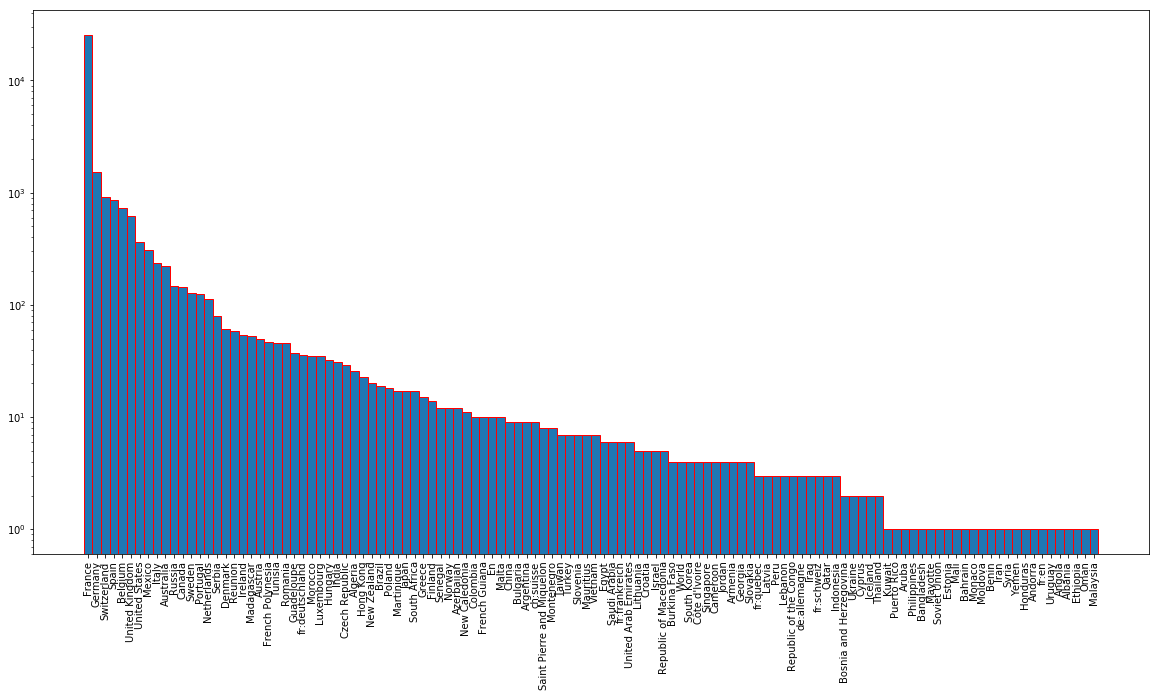

In [97]:
#dico_s = sorted((value, key) for (key,value) in dico.items())
dico_s = collections.OrderedDict(sorted(dico.items(), key=lambda t: t[1],reverse=True))
fig,ax = plt.subplots(figsize=(20, 10))
ax.bar(list(dico_s.keys()), list(dico_s.values()), align='center', width=1,log=True,edgecolor = "red")
plt.xticks(rotation=90);

We could visualise in which country we consume the most some type of food...

In [100]:
food_cleaned.pnns_groups_2.replace(to_replace=np.nan, value="unknown",inplace=True)

In [103]:
food_cleaned.pnns_groups_2.value_counts()

unknown                             555304
Sweets                               12156
One-dish meals                       12054
Biscuits and cakes                   11659
Milk and yogurt                       7328
Cereals                               6700
Dressings and sauces                  6660
Cheese                                6591
Sweetened beverages                   6476
Chocolate products                    5986
Alcoholic beverages                   5827
Processed meat                        5821
Vegetables                            5263
Fats                                  4675
Appetizers                            4356
Fish and seafood                      4298
Fruits                                3730
Bread                                 3576
Fruit juices                          3079
Meat                                  2981
Breakfast cereals                     2545
Dairy desserts                        1993
Ice cream                             1945
Artificiall

In [107]:
dico = dict()
for i in food_cleaned.loc[food_cleaned.pnns_groups_2 == "Chocolate products"].countries:
    if (type(i) != float):
        for j in i :
            if (dico.get(j)):
                dico[j] +=1
            else:
                dico.update({j:1})


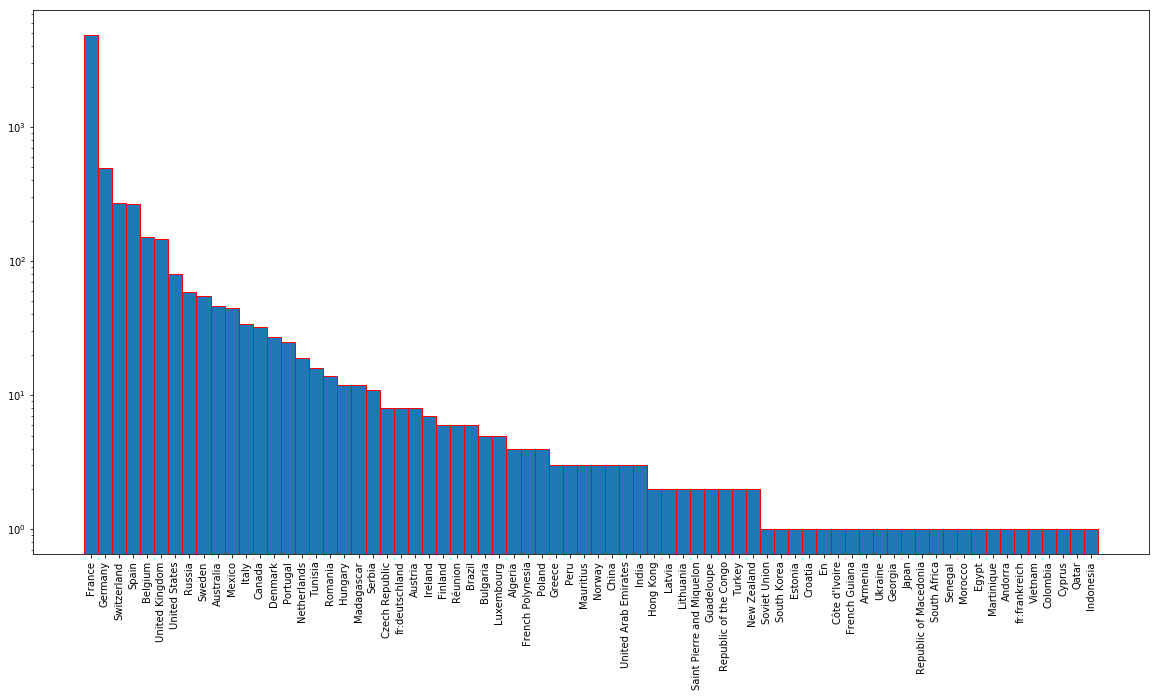

In [108]:
dico_s = collections.OrderedDict(sorted(dico.items(), key=lambda t: t[1],reverse=True))
fig,ax = plt.subplots(figsize=(20, 10))
ax.bar(list(dico_s.keys()), list(dico_s.values()), align='center', width=1,log=True,edgecolor = "red")
plt.xticks(rotation=90);

We remove the `states` values since it is not well completed

In [127]:
food_cleaned.drop(columns=["states","states_tags","states_en"],inplace = True)

In [128]:
food_cleaned.columns

Index(['url', 'creator', 'created_t', 'last_modified_t', 'product_name',
       'generic_name', 'quantity', 'brands', 'labels', 'stores', 'countries',
       'ingredients_text', 'additives', 'nutrition_grade_fr', 'pnns_groups_1',
       'pnns_groups_2', 'main_category', 'main_category_en'],
      dtype='object')

In [131]:
percentageNonNa(food_cleaned.main_category_en)

0.25772614547191197

In [132]:
for p in food_cleaned.main_category_en:
    if (not pd.isnull(p)):
        print(p)

Pies
Plant-based foods and beverages
Plant-based foods and beverages
Seafood
Dietary supplements
fr:filet-de-boeuf
Food decorations
Meals
Meals
Plant-based foods and beverages
Sugary snacks
Plant-based foods and beverages
Sugary snacks
fr:boulange
Plant-based foods and beverages
Beverages
Sugary snacks
Beverages
Meals
Meats
Plant-based foods and beverages
Sugary snacks
Beverages
Beverages
Syrups
Food decorations
Marzipan
Sugary snacks
Sugary snacks
Chicken-feet
Meals
Beverages
Pains-bagel
Plant-based foods and beverages
Plant-based foods and beverages
Desserts
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Beverages
Groceries
Beverages
Frozen foods
Meats
fr:crepes-au-jambon-et-au-fromage
Sugary snacks
Desserts
Plant-based foods and beverages
Groceries
Plant-based foods and beverages
Groceries
Beverages
Sugary snacks
Spreads
Plant-based foods and beverages
Dietary supplements
Dietary supplements
Dietary supplements
Groceries
Sugary snacks
Sugary snacks
Meats
Dietary supplements

Groceries
Groceries
Groceries
Sugary snacks
Groceries
Sugary snacks
Sugary snacks
Groceries
Groceries
Pains-bagel
Pains-bagel
Canned foods
Plant-based foods and beverages
Sugary snacks
Groceries
Fruit juices
Plant-based foods and beverages
Sugary snacks
Sugary snacks
Seafood
Seafood
Black-truffle-oil
Groceries
Meals
Groceries
Groceries
Groceries
Groceries
Fruit juices
Fruit juices
Fruit juices
Aliments-et-boissons-a-base-de-vegetaux
Plant-based foods and beverages
Pains-bagel
Plant-based foods and beverages
Plant-based foods and beverages
Pains-bagel
Pains-bagel
Plant-based foods and beverages
Fruit juices
Sugary snacks
Plant-based foods and beverages
Plant-based foods and beverages
Pains-bagel
Pains-bagel
Pains-bagel
Plant-based foods and beverages
Sugary snacks
Groceries
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Grated-parmesan-cheese
Groceries
Groceries
Groceries
Groceries
Fruit juices
Spreads
es:sustitutos-de-crema
Beverages
B

Sugary snacks
Sugary snacks
Sugary snacks
Groceries
Spreads
Farming products
Cashews
Meals
Beverages
Beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Fats
Fats
Salty snacks
Plant-based foods and beverages
Cremes-glacees
Plant-based foods and beverages
Salty snacks
Meals
Sliced-cheddar
Refrigerated foods
Meats
Refrigerated foods
Meats
Refrigerated foods
Refrigerated foods
Refrigerated foods
Groceries
Groceries
Plant-based foods and beverages
Frozen foods
Groceries
Groceries
Groceries
Groceries
Plant-based foods and beverages
Beverages
Sugary snacks
Salty snacks
Groceries
Dairies
Dairies
Comestibles
Corn-tortilla-chips
Salty snacks
Salty snacks
Salty snacks
Salty snacks
Aperitif
es:botana
Salty snacks
es:botanas
Beverages
Beverages
Beverages
Beverages
Root-beer
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Plant-based foods and beverages
Groceries
Chicken-thighs-fillets
Sugary snacks
Plant-based foods and beverages
Pl

Plant-based foods and beverages
Fats
Beverages
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Dairies
Quesos
Dairies
Dairies
Beverages
Beverages
Beverages
Plant-based foods and beverages
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Plant-based foods and beverages
fr:cinnamon-bun
Beverages
Crêpes and galettes
Plant-based foods and beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Plant-based foods and beverages
Dietary supplements
es:galleta-de-maiz-blanco-horneada
Sugary snacks
es:tostadas-horneadas
es:totopos-horneados
es:galletas-de-maiz-azul-horneadas
Plant-based foods and beverages
es:galleta-de-maiz-blanco-horneado-con-chia-linaza-arroz
Preparations-pour-chai
Dairies
Beverages
Beverages
Beverages
Groceries
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugar

Meals
Meats
Meals
Sugary snacks
Meals
Dairies
Seafood
Sugary snacks
Sugary snacks
Sandwiches
Sandwiches
Sandwiches
Sandwiches
Sandwiches
Sandwiches
Sandwiches
Chicken-burger
Chips and fries
Chips and fries
Chips and fries
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Plant-based foods and beverages
Sugary snacks
Sugary snacks
Beverages
Beverages
Meals
Spreads
Plant-based foods and beverages
Beverages
fr:garniture-bouchee-a-la-reine
Spreads
Dairies
Dairies
Groceries
Groceries
Meals
Sugary snacks
Meats
Dairies
Plant-based foods and beverages
Dairies
Beverages
Plant-based foods and beverages
Dairies
Plant-based foods and beverages
Plant-based foods and beverages
Dairies
Dairies
Beverages
Sandwiches
Beverages
Sugary snacks
Kakaopulver
Dairies
Plant-based foods and beverages
Beverages
es:leche-de-almendras-sin-azucar
Sandwiches
Canned foods
Plant-based foods and beverages
Plant-based foods and beverages
Sugary snacks
Sugary snacks
Plant-based foods and beverages
Meals
Beverages
Sugary snacks
Da

Plant-based foods and beverages
Dairies
es:huiles-de-sesame
Plant-based foods and beverages
Plant-based foods and beverages
Meats
Groceries
de:fruits-a-coque-sales
Groceries
de:rinderbruhe
Plant-based foods and beverages
Terrine
Spreads
Groceries
Plant-based foods and beverages
Dairies
Meats
Salty snacks
Dairies
Plant-based foods and beverages
Dairies
Meats
Dairies
Plant-based foods and beverages
Dairies
Beverages
fr:alimentos-de-origen-vegetal
Meats
Meats
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Meats
Meats
Meat-based products
Meats
Meals
Dairies
Dairies
Dairies
Beverages
Dairies
Plant-based foods and beverages
Dairies
Fruit juices
Beverages
Desserts
Sugary snacks
Fats
Beverages
Groceries
Meats
Meats
Plant-based foods and beverages
Plant-based foods and beverages
Meals
Salty snacks
de:filets-de-poulet
Sugary snacks
Plant-based foods and beverages
Sugary snacks
Plant-based foods and beverages
Plant-b

Plant-based foods and beverages
Farming products
Dairies
Dairies
Meats
Dairies
Groceries
Dairies
Meats
fr:fromages-double-creme
Dairies
Groceries
Dairies
Dairies
fr:roher-fisch
Plant-based foods and beverages
Seafood
Dairies
Sugary snacks
Dairies
Dairies
fr:levures
Beverages
Sugary snacks
Dairies
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Dairies
Marinated olives
de:charcuteries
Meats
Dairies
de:schoko-schaumkusse
Plant-based foods and beverages
Meats
Dairies
Dairies
Plant-based foods and beverages
Dairies
Beverages
Sugary snacks
de:produits-a-tartiner
Meals
Plant-based foods and beverages
Dairies
Frozen foods
Beverages
Meats
Sugary snacks
Sugary snacks
Plant-based foods and beverages
de:antipasti
Spreads
Sugary snacks
Sugary snacks
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Meats
Sugary snacks
fr:eis-am-stiel
de:plats-prepares-d-origine-vegetale
Sugary snacks
Meats
Beverages
Plant

Plant-based foods and beverages
Beverages
nl:boissons
Salty snacks
Beverages
Plant-based foods and beverages
Plant-based foods and beverages
Beverages
Beverages
Fruit juices
Fruit juices
fr:fromages-d-abbaye
Sugary snacks
Seafood
Plant-based foods and beverages
Beverages
Beverages
Meats
Meats
Sugary snacks
fr:gougeres
Sugary snacks
fr:preparation-pour-pain
Plant-based foods and beverages
Sugary snacks
Seafood
Canned foods
Groceries
Sugary snacks
Plant-based foods and beverages
Fruit juices
Dairies
Plant-based foods and beverages
Sandwiches
Eaux-minerales-naturelles
Dietary supplements
Plant-based foods and beverages
Sugary snacks
Dairies
Beverages
Plant-based foods and beverages
fr:filet-americain
Meals
Dairies
Beverages
Groceries
Groceries
Beverages
Plant-based foods and beverages
Groceries
Sugary snacks
Plant-based foods and beverages
Groceries
Groceries
Beverages
Beverages
Plant-based foods and beverages
Meals
Dairies
Plant-based foods and beverages
Seafood
fr:vermicelles-en-chocola

Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
de:saumons-fumes-sauvages
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Seafood
Groceries
Plant-based foods and beverages
Meals
Meals
Meats
Meals
Seafood
Seafood
Seafood
Meats
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Beverages
Breakfasts
Sugary snacks
fr:cereales-chicoree
Baby foods
Fruit juices and nectars
Be

Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Fruits-en-conserve
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
fr:desserts-fruitiers
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages

Dairies
Dairies
Dairies
Dairies
Dairies
Dairies
Dairies
Dairies
Dairies
Beverages
Dairies
Dairies
Dairies
Dairies
Dairies
Spreads
Meals
Meals
Meals
Meals
Meals
Meals
Meals
Meals
Meals
Meals
Meals
Meals
Meals
Meals
Meals
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Meals
Plant-based foods and beverages
fr:tortellini-a-base-de-viande
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Meals
Meals
Meals
Meals
Meals
Meals
Pet food
Sandwiches
Meats
Pet food
Pizza dough
Pizza dough
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Fresh foods
Meats
Meats
Meats
Sugary snacks
Meats
Meats
Meats
Meats
Meats
Fresh foods
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Sandwiches
Meats
Meats
Meats
Meats
Meats
Sugary snacks
Pet food
Meats
Meat

Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
xx:getranke
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Fats
Fats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Dindes
Meats
Meats
Meats
Meats
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Beverages
Sweeteners
Beverages
Syrups
Beverages
Beverages
Beverages
Beverages
Sugary snacks
Beverages
Cooking helpers
Cooking helpers
Beverages
Syrups
Beverages
Beverages
Beverages
Syrups
Beverages
Beverages
Plant-based foods

Sandwiches
Sandwiches
Sandwiches
Sandwiches
Sandwiches
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meats
Meals
Meats
Meals
Plant-based foods and beverages
Meats
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Sugary snacks
Sugary snacks
Sugary snacks
Sugary snacks
Dairies
Sugary snacks
Beverages
Beverages
Beverages
fr:boisson-au-soja
Canned foods
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Plant-based foods and beverages
Sugary snacks
Sugary snacks
Meats
Meats
Meats
Dairies
Plant-based foods and beverages
Sugary snacks
Plant-based foods and beverages
Meals
Sugary snacks
Meals
Fats
Meals
Plant-based foods and beverages
Plant-based foods and beverages
Sugary snacks
Sugary snacks
Plant-based 

KeyboardInterrupt: 

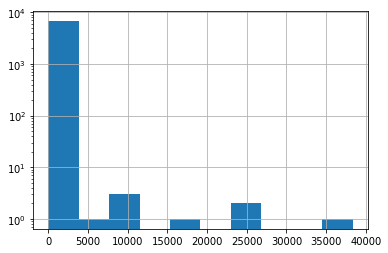

In [135]:
food_cleaned.main_category_en.value_counts().hist(log =True)